# EXERCISE

Create a combination of the maps (cafe, sub-district, transjakarta) to determine the number of cafes within a 200 m radius of the transjakarta route. Visualize.

In [2]:
import pandas as pd # untuk pengolahan dataframe
import geopandas as gpd #untuk mentransformasi dataframe yang tidak ada informasi geometrinya menjadi ada.
import osmnx as ox #untuk mining data dari openstreetmap
import matplotlib.pyplot as plt #hasil map-nya bisa diatur(struktur, ukuran frame, warna, marker size)
from shapely.geometry import Point, LineString, Polygon #(membuat elemen geomeri tertentu)
from pyproj import CRS


%matplotlib inline
import os
import contextily as ctx #Untuk setting basemap 
import xyzservices.providers as xyz
import numpy as np

epsg_jkt = 5330
epsg_mercator = 3857
# default_crs = {'init':'epsg:4326'} #Versi lama: error
default_crs = CRS('epsg:4326') #Versi terbaru

### Koordinat system yang digunakan:
Umumnya, coordinate system yang digunakan adalah WGS84 (detailnya [presentasi pacmannnya](https://drive.google.com/file/d/1GiLH0nKAZ6jFLUwkqG-oWM5H_cgZmXga/view) terkait WGS84 bisa dilihat [disini](https://en.wikipedia.org/wiki/Earth_ellipsoid#Historical_Earth_ellipsoids)). WGS84 sendiri memiliki beberapa versi satuan
- [EPSG 4326](https://epsg.io/4326): Satuannya *degree*, center cooordinatesnya di (0,0). Untuk global.
- [EPSG 3857](https://epsg.io/3857): Sama sepertiat EPSG 4326, namun suannya sudah ditransformasi menjadi *meter*. Untuk Global
- [EPSG 4813](https://epsg.io/4813): Satuannya *degree*, areanya mencakup <u>**Jawa-Bali, dan Barat Sumatera**</u>. 
- [EPSG 5330](https://epsg.io/5330): ***Yang digunakan sekarang.*** Karena cukup presisi, dimana area cakupannya mencakup <u>**Jawa-Bali, dan Barat Sumatera**</u>. 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;: Satuannya sudah *meter*.

# Jakarta

In [332]:
gpd.read_file("dataviz_day13/dki_kelurahan")

,KEL_NAME,Kecamatan,ID,geometry
0,ANCOL,PADEMANGAN,3175020003,"MULTIPOLYGON (((707809.351 9325946.407, 707807..."
1,ANGKE,TAMBORA,3174050007,"POLYGON ((699252.687 9320662.247, 699263.479 9..."
2,BALE KAMBANG,KRAMAT JATI,3172050001,"POLYGON ((705559.349 9306841.684, 705593.877 9..."
3,BALI MESTER,JATINEGARA,3172060007,"POLYGON ((706928.523 9311600.298, 706929.862 9..."
4,BAMBU APUS,CIPAYUNG,3172030006,"MULTIPOLYGON (((712163.134 9302960.389, 712163..."
...,...,...,...,...
257,WARAKAS,TANJUNG PRIOK,3175030004,"POLYGON ((708396.749 9322651.66, 708397.774 93..."
258,WIJAYA KESUMA,GROGOL PETAMBURAN,3174040006,"POLYGON ((697071.156 9319809.99, 697076.282 93..."
259,KAMAL,KALIDERES,3174080005,"POLYGON ((687530.401 9325928.617, 687662.711 9..."
260,SUNTER JAYA,TANJUNG PRIOK,3175030002,"POLYGON ((708740.436 9320832.526, 708827.182 9..."


In [7]:
jakarta = gpd.read_file("../Dataset Kelas Data Visualization/Pertemuan 13/dki_kelurahan")

# proyeksi ke planar
jakarta_planar = jakarta.to_crs(epsg=epsg_jkt)

# # hitung luas dalam hektar
# jakarta_planar["luas_hektar"] = jakarta_planar.area/(10000^2)

In [8]:
jakarta_planar.head(3)

,KEL_NAME,Kecamatan,ID,geometry
0,ANCOL,PADEMANGAN,3175020003,"MULTIPOLYGON (((3553351.561 226845.401, 355334..."
1,ANGKE,TAMBORA,3174050007,"POLYGON ((3544791.113 221518.378, 3544802.766 ..."
2,BALE KAMBANG,KRAMAT JATI,3172050001,"POLYGON ((3551162.783 207681.934, 3551197.414 ..."


<Axes: >

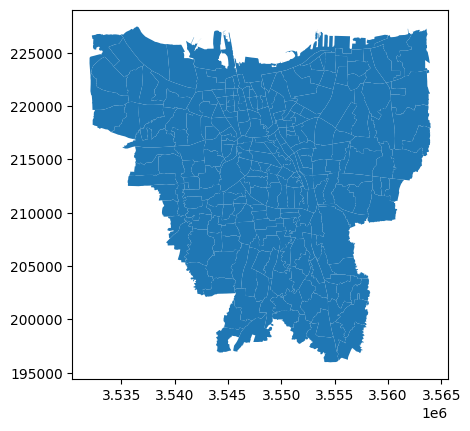

In [9]:
jakarta_planar.plot()

# Cafe

In [316]:
tags = {'amenity': 'cafe'}
cafe = ox.features_from_place("Jakarta, Indonesia", tags)
print(len(cafe))

641


In [298]:
cafe["random_bobot"] = np.random.uniform(size=len(cafe))

<Axes: >

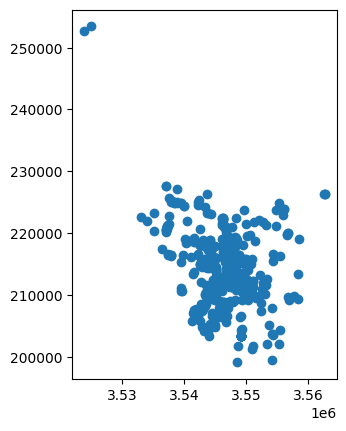

In [303]:
# proyeksi geodataframe cafe ke planar
cafe_planar = cafe.to_crs(epsg=epsg_jkt)
cafe_planar.plot()

In [ ]:
cafe_planar = cafe_planar.reset_index()
cafe_planar = cafe_planar[['id', 'name', 'amenity', 'geometry']]
cafe_planar

,id,name,amenity,geometry
0,824317908,Internet cafe,cafe,POINT (3547954.666 216730.099)
1,824317972,Tator,cafe,POINT (3547961.903 216767.505)
2,824317998,Internet cafe,cafe,POINT (3547966.964 216805.398)
3,824318107,Internet cafe,cafe,POINT (3547971.37 216820.913)
4,1912469553,Cafe Al Tahrir,cafe,POINT (3548335.593 212907.696)
...,...,...,...,...
636,1218851818,Kafe Hoax,cafe,"POLYGON ((3550456.144 224129.443, 3550451.383 ..."
637,1227723069,Lege Coffee and Toastie,cafe,"POLYGON ((3547066.665 211870.887, 3547061.227 ..."
638,1256506311,Deracikan,cafe,"POLYGON ((3544986.406 210340.172, 3544982.211 ..."
639,1296446325,Old Town White Coffee,cafe,"POLYGON ((3544837.142 210742.673, 3544850.061 ..."


<Axes: >

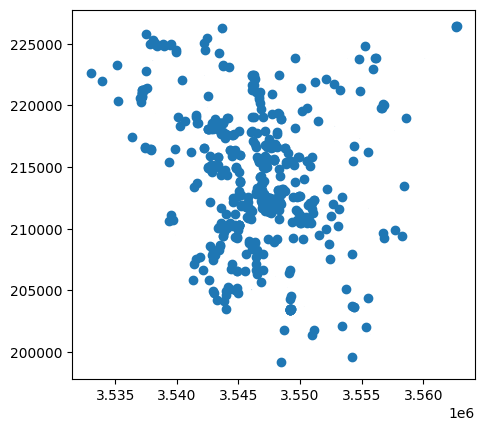

In [326]:
cafe_jakarta = gpd.sjoin(cafe_planar.reset_index()[["id","name","geometry"]], 
                           jakarta_planar)

cafe_jakarta.plot()

# Transjakarta

In [309]:
transjakarta_lines = gpd.read_file('dataviz_day13/transjakarta_lines.geojson')
transjakarta_data = pd.read_excel("dataviz_day13/TJ_Agustus_2020.xlsx", index_col=0).reset_index() #no transposing required in this case 

# convert ke planar
transjakarta_planar = transjakarta_lines.to_crs(epsg=epsg_jkt)

In [311]:
# # gabungkan data keduanya
# transjakarta = pd.merge(transjakarta_lines, transjakarta_data)

# # convert kembali ke geodataframe
# transjakarta = gpd.GeoDataFrame(transjakarta)

# # beri crs
# transjakarta.crs = transjakarta_lines.crs

# # convert ke planar
# transjakarta_planar = transjakarta.to_crs(epsg=epsg_jkt)

In [312]:
transjakarta_planar

,koridor,geometry,Rata-rata Harlan,Rata-rata Weekday,Rata-rata Weekend
0,1,"LINESTRING (3544955.741 210385.379, 3544981.93...",28434,35590,31435
1,2,"LINESTRING (3556831.104 217050.944, 3556869.21...",11574,13576,12413
2,3,"LINESTRING (3534340.226 220084.894, 3534365.23...",15090,17755,16207
3,4,"LINESTRING (3556818.007 217047.373, 3556818.00...",8332,10669,9312
4,5,"LINESTRING (3548247.008 222523.761, 3548326.78...",11604,14139,12667
5,6,"LINESTRING (3546859.73 203458.366, 3546876.4 2...",10825,15302,12702
6,7,"LINESTRING (3552137.161 212465.319, 3552171.68...",11139,12996,11917
7,8,"LINESTRING (3546987.186 218980.785, 3546965.74...",13744,16879,15059
8,9,"LINESTRING (3554294.774 205100.625, 3554249.52...",20795,27325,23534
9,10,"LINESTRING (3553823.295 225212.354, 3554967.60...",11866,14465,12956


<Axes: >

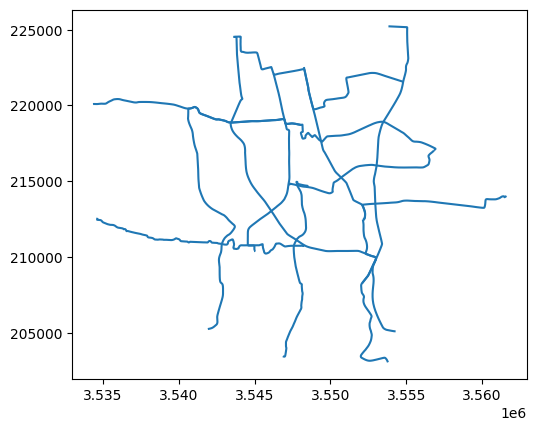

In [21]:
transjakarta_planar.plot()

---
# ==================EXERCISE==================

Create a combination of the maps (cafe, sub-district, transjakarta) to determine the number of cafes within a 200 m radius of the transjakarta route. Visualize.

In [320]:
cafe_jakarta = gpd.sjoin(cafe_planar.reset_index()[["id","name","geometry"]], 
                           jakarta_planar)

cafe_jakarta

,id,name,geometry,index_right,KEL_NAME,Kecamatan,ID
0,824317908,Internet cafe,POINT (3547954.666 216730.099),120,KEBON SIRIH,MENTENG,3173020005
1,824317972,Tator,POINT (3547961.903 216767.505),120,KEBON SIRIH,MENTENG,3173020005
2,824317998,Internet cafe,POINT (3547966.964 216805.398),120,KEBON SIRIH,MENTENG,3173020005
3,824318107,Internet cafe,POINT (3547971.37 216820.913),120,KEBON SIRIH,MENTENG,3173020005
4,1912469553,Cafe Al Tahrir,POINT (3548335.593 212907.696),107,KARET KUNINGAN,SETIA BUDI,3171100003
...,...,...,...,...,...,...,...
636,1218851818,Kafe Hoax,"POLYGON ((3550456.144 224129.443, 3550451.383 ...",0,ANCOL,PADEMANGAN,3175020003
637,1227723069,Lege Coffee and Toastie,"POLYGON ((3547066.665 211870.887, 3547061.227 ...",60,KARET SEMANGGI,SETIA BUDI,3171100001
638,1256506311,Deracikan,"POLYGON ((3544986.406 210340.172, 3544982.211 ...",157,MELAWAI,KEBAYORAN BARU,3171060005
639,1296446325,Old Town White Coffee,"POLYGON ((3544837.142 210742.673, 3544850.061 ...",157,MELAWAI,KEBAYORAN BARU,3171060005


<Axes: >

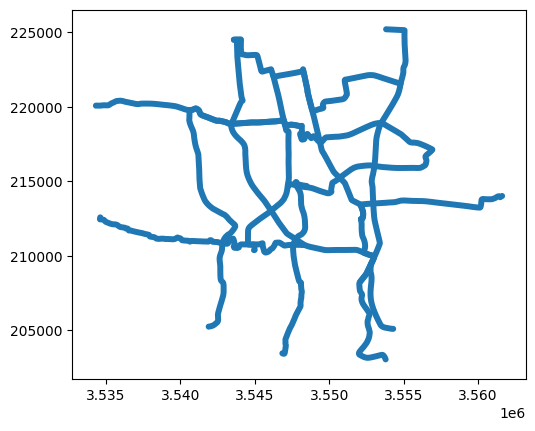

In [339]:
transjakarta_planar_buff200 = transjakarta_planar.copy()
transjakarta_planar_buff200["geometry"] = transjakarta_planar.geometry.buffer(200) #buffer: ngelebarin ukuran line
transjakarta_planar_buff200.plot()

<Axes: >

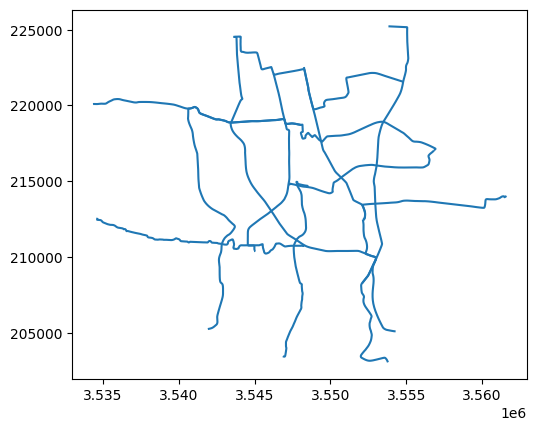

In [ ]:
transjakarta_planar.plot()

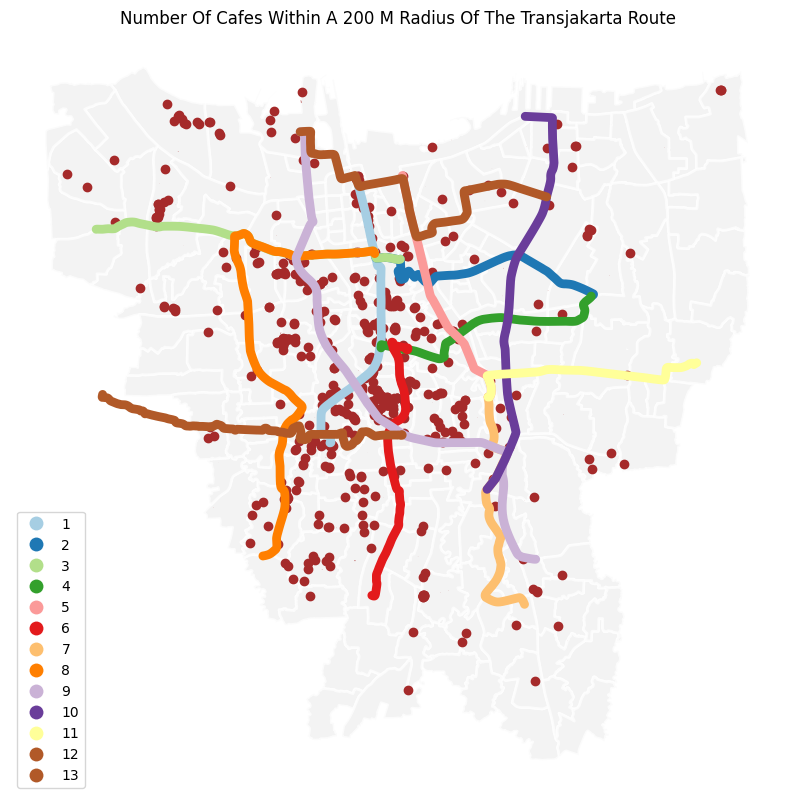

In [340]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
jakarta_planar.plot(ax=ax, facecolor="#eeeeee", linewidth=2, edgecolor="white", alpha=0.7)
# tj_kelurahan.plot(column="koridor", categorical=True, k=13, cmap="Paired", alpha=0.5, ax=ax)
cafe_jakarta.plot(ax=ax, linewidth=1, color='brown')
transjakarta_planar_buff200.plot(ax=ax, linewidth=4, column="koridor", alpha=1, categorical=True, legend=True, k=13, cmap="Paired")
# legend = plt.legend(title="Koridor Transjakarta",
#                     loc=4, fontsize='small', fancybox=True)
ax.axis("off")
ax.set_title("Number Of Cafes Within A 200 M Radius Of The Transjakarta Route")

plt.show()